In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/datsoftlyngby/soft2019spring-ai/master/projects/project1/users.json'
df = pd.read_json(url)
df.head(10)

about       created error  \
0                                                NaN  1.510266e+09   NaN   
1                          Ruby, Open Source, Devops  1.325548e+09   NaN   
2                                                NaN  1.459331e+09   NaN   
3  [ my public key: https:&#x2F;&#x2F;keybase.io&...  1.379698e+09   NaN   
4  Email: ejstronge@gmail.com\nGithub: https:&#x2...  1.355740e+09   NaN   
5                                                NaN  1.276201e+09   NaN   
6                                                NaN  1.382222e+09   NaN   
7                                                NaN  1.330724e+09   NaN   
8                                                NaN  1.475393e+09   NaN   
9                         github.com&#x2F;allcentury  1.389810e+09   NaN   

             id   karma  submitted  
0    gcgggfxsdg    -1.0          5  
1       sheerun   102.0         51  
2      keypress    79.0         70  
3       pyprism  1356.0        114  
4     ejstronge   460.0        144  
5     akira2501   880.0        304  
6  matchagaucho   412.0        228  
7       bberrry   273.0         49  
8  sharjeelsidd     1.0          1  
9    allcentury    56.0         41

In [3]:
xtime = df.loc[:, 'created']
df = df[df['created'].notnull()]
X = np.array(df['created']).reshape(9299, 1)

In [4]:
ypoint = df.loc[:, 'karma']
df = df[df['karma'].notnull()]
y = np.array(df['karma'])

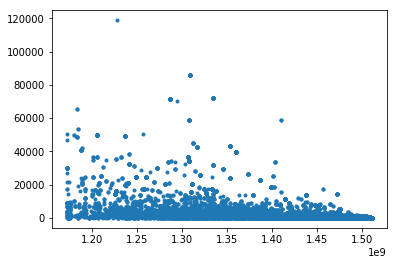

In [5]:
plt.plot(X, y, '.')

Model Selection: We've chosen to use a linear regression model because we can't exactly determine a correlation between the points gained and the time it takes to get to 1000, so we go with the suggested model by the assignment

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
prediction = model.predict(X_test)
prediction

array([6790.37378978, 7537.20219236, 7154.23331371, ..., 4639.63369152,
       5896.96447282, 5905.49106938])

In [9]:
len(prediction)

3069

In [10]:
coefficient = model.coef_
intercept = model.intercept_
print ("Coefficient:",coefficient)
print ("Intercept:",intercept)

Coefficient: [-3.70900589e-05]
Intercept: 55271.935993934785


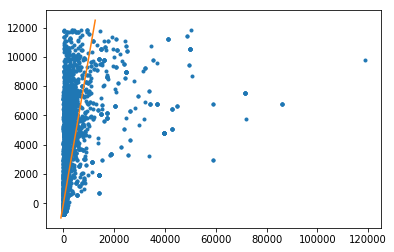

In [11]:
y_pred = prediction
plt.plot(y_test, y_pred, '.')
x_axis = np.linspace(-1000, 12500, 3069)
y_axis = x_axis
plt.plot(x_axis, y_axis)
plt.show()

Part 2

In [12]:
zpost = df.loc[:, 'submitted']
df = df[df['submitted'].notnull()]
Z = np.array(df['submitted']).reshape(9299, 1)

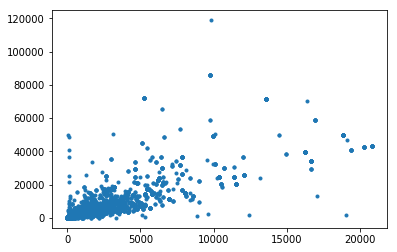

In [13]:
plt.plot(Z, y, '.')

In [14]:
Z_train, Z_test, yz_train, yz_test = train_test_split(Z, y, test_size=0.33, random_state=42, shuffle=True)

In [15]:
model_z = LinearRegression()
model_z.fit(Z_train, yz_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
prediction_z = model_z.predict(Z_test)
prediction_z

array([47095.14228734,  1122.05981496,   264.09487808, ...,
        1459.71053205,  8564.21373514,  3950.57647782])

In [17]:
len(prediction_z)

3069

In [18]:
coefficient_z = model_z.coef_
intercept_z = model_z.intercept_
print ("Coefficient:",coefficient_z)
print ("Intercept:",intercept_z)

Coefficient: [2.76762883]
Intercept: 214.27755916513524


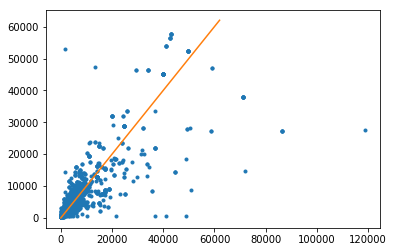

In [19]:
yz_pred = prediction_z
plt.plot(yz_test, yz_pred, '.')
xz_axis = np.linspace(0, 62000, 3069)
yz_axis = xz_axis
plt.plot(xz_axis, yz_axis)
plt.show()

Using sklearn with multidimensional input and output samples (e.g. vectors)

In [20]:
X_1 = X.flatten()
X_2 = Z.flatten()
Y = y.flatten()

In [21]:
from pandas import DataFrame 

modelxyz = {'created': X_1, 'submitted': X_2, 'karma': Y}
df_m = DataFrame(modelxyz, columns=['created','submitted','karma'])
X_mutil = df_m[['created','submitted']].astype(object)
y_mutil = df_m['karma'].astype(object)

In [22]:
X_trainMutil, X_testMutil, y_trainMutil, y_testMutil = train_test_split(X_mutil, y_mutil, test_size=0.33, random_state=42, shuffle=True)

In [23]:
modelMutil = LinearRegression()
modelMutil.fit(X_trainMutil, y_trainMutil)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
predictionMutil = modelMutil.predict(X_testMutil)
predictionMutil

array([46330.21478189,  1790.29855459,   893.28291085, ...,
        1637.98991383,  8748.5827471 ,  4267.76016908])

In [25]:
len(predictionMutil)

3069

In [26]:
coefficientMutil = modelMutil.coef_
interceptMutil = modelMutil.intercept_
print ("Coefficient:",coefficientMutil)
print ("Intercept:",interceptMutil)

Coefficient: [-6.14858271e-06  2.68880388e+00]
Intercept: 8821.568305901863


3D

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf

In [28]:
model3D = smf.ols(formula='submitted ~ created + karma', data=df_m)
results_formula = model3D.fit()
results_formula.params

Intercept    3291.708305
created        -0.000002
karma           0.250053
dtype: float64

In [29]:
x_surf, y_surf = np.meshgrid(np.linspace(df_m.created.min(), df_m.created.max(), 100),np.linspace(df_m.karma.min(), df_m.karma.max(), 100))
onlyX = DataFrame({'created': x_surf.ravel(), 'karma': y_surf.ravel()})
fittedY = results_formula.predict(exog=onlyX)

<IPython.core.display.Javascript object>


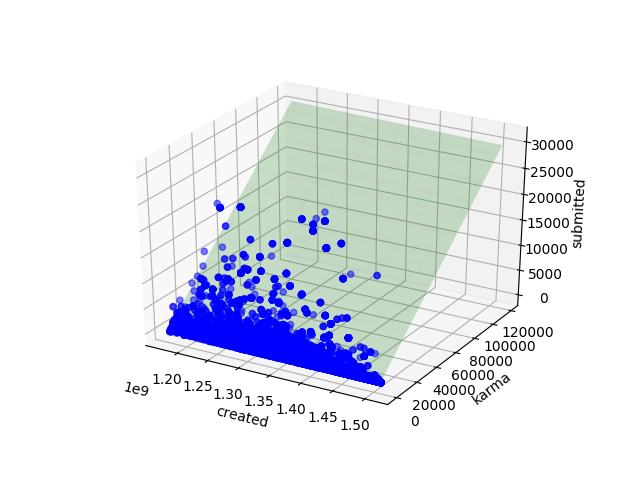

In [30]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_m['created'], df_m['karma'], df_m['submitted'], c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.values.reshape(x_surf.shape), color='green', alpha=0.2)
ax.set_xlabel('created')
ax.set_ylabel('karma')
ax.set_zlabel('submitted')
plt.show()

Part 3

In [33]:
import os
import requests

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
filename = os.path.join('/tmp', os.path.basename(url))
r = requests.get(url)

with open(filename, 'wb') as f:
    f.write(r.content)

In [35]:
%%bash
sed -i '1s;^;ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension\n;' /tmp/wdbc.data

In [36]:
%%bash
head /tmp/wdbc.data

ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>


In [ ]:
data = pd.read_csv('/tmp/wdbc.data')
data.head()

In [ ]:
len(data)